In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
cur_dir=os.getcwd()

### Loading the dataset

In [2]:
train=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
sales_data=train['family'].to_list()

In [4]:
print(set(sales_data))
print(len(set(sales_data)))


{'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'EGGS', 'HOME AND KITCHEN II', 'DELI', 'GROCERY II', 'FROZEN FOODS', 'PERSONAL CARE', 'HOME AND KITCHEN I', 'SEAFOOD', 'HOME CARE', 'BEVERAGES', 'POULTRY', 'DAIRY', 'GROCERY I', 'HARDWARE', 'PLAYERS AND ELECTRONICS', 'CLEANING', 'BEAUTY', 'SCHOOL AND OFFICE SUPPLIES', 'AUTOMOTIVE', 'MEATS', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'PET SUPPLIES', 'BABY CARE', 'PRODUCE', 'HOME APPLIANCES', 'LAWN AND GARDEN', 'LINGERIE', 'MAGAZINES', 'LADIESWEAR'}
33


In [5]:
holidays=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\holidays_events.csv")

In [6]:
holidays.head()
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
oil=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
transactions=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
sample_submission=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\sample_submission.csv")
sample_submission.head()


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [10]:
test=pd.read_csv(r"C:\Users\Dell\Documents\projects\time series forecasting\test.csv")
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [11]:
sales_date=train[['date','sales']]

In [12]:
sales_date.head()
sales_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   sales   float64
dtypes: float64(1), object(1)
memory usage: 45.8+ MB


In [13]:
sales_date['date']=pd.to_datetime(sales_date['date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_12048\1809510822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_date['date']=pd.to_datetime(sales_date['date'])


In [14]:
sales_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   sales   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 MB


In [15]:
sales_date.dropna()

,date,sales
0,2013-01-01,0.000
1,2013-01-01,0.000
2,2013-01-01,0.000
3,2013-01-01,0.000
4,2013-01-01,0.000
...,...,...
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729
3000886,2017-08-15,121.000


## Grouping the data by date so that we can apply a suitable time series model to it.

1684
                    sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229
...                   ...
2017-08-11  826373.722022
2017-08-12  792630.535079
2017-08-13  865639.677471
2017-08-14  760922.406081
2017-08-15  762661.935939

[1684 rows x 1 columns]


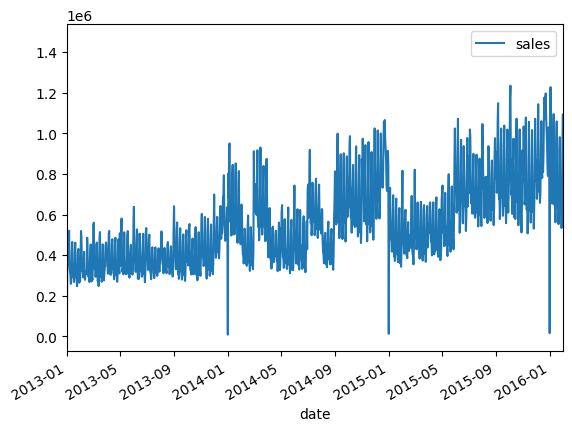

In [16]:
sales_ind=sales_date[['date','sales']].groupby('date').sum()
print(sales_ind.size)
print(sales_ind)
sales_ind.plot()
plt.xlim('2013-01-01','2016-01-31')
plt.show()

## There seems to be an yearly seasonal component

<Axes: xlabel='date'>

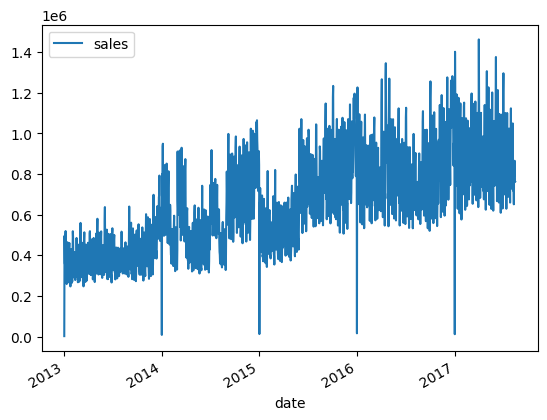

In [17]:
sales_ind.plot()

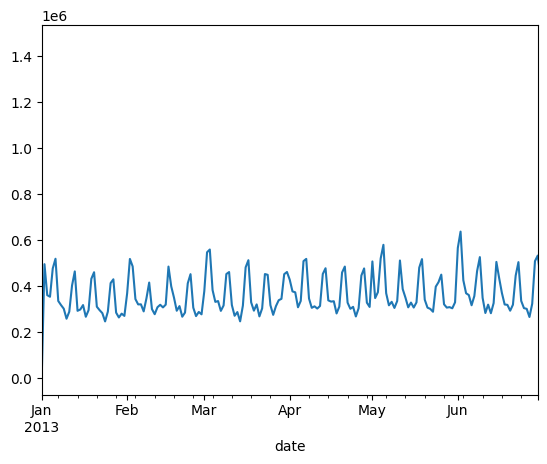

In [18]:
new=sales_ind['sales'].resample('D').mean()
new.plot()
plt.xlim('2013-01-01','2013-06-30')
plt.show()

## There is weekly seasonal component as well. However no monthly seasonality is observed.

In [19]:
new2=new.bfill()
new2.isna().sum()


0

C:\Users\Dell\AppData\Local\Temp\ipykernel_12048\874845416.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4


<Figure size 1600x1600 with 0 Axes>

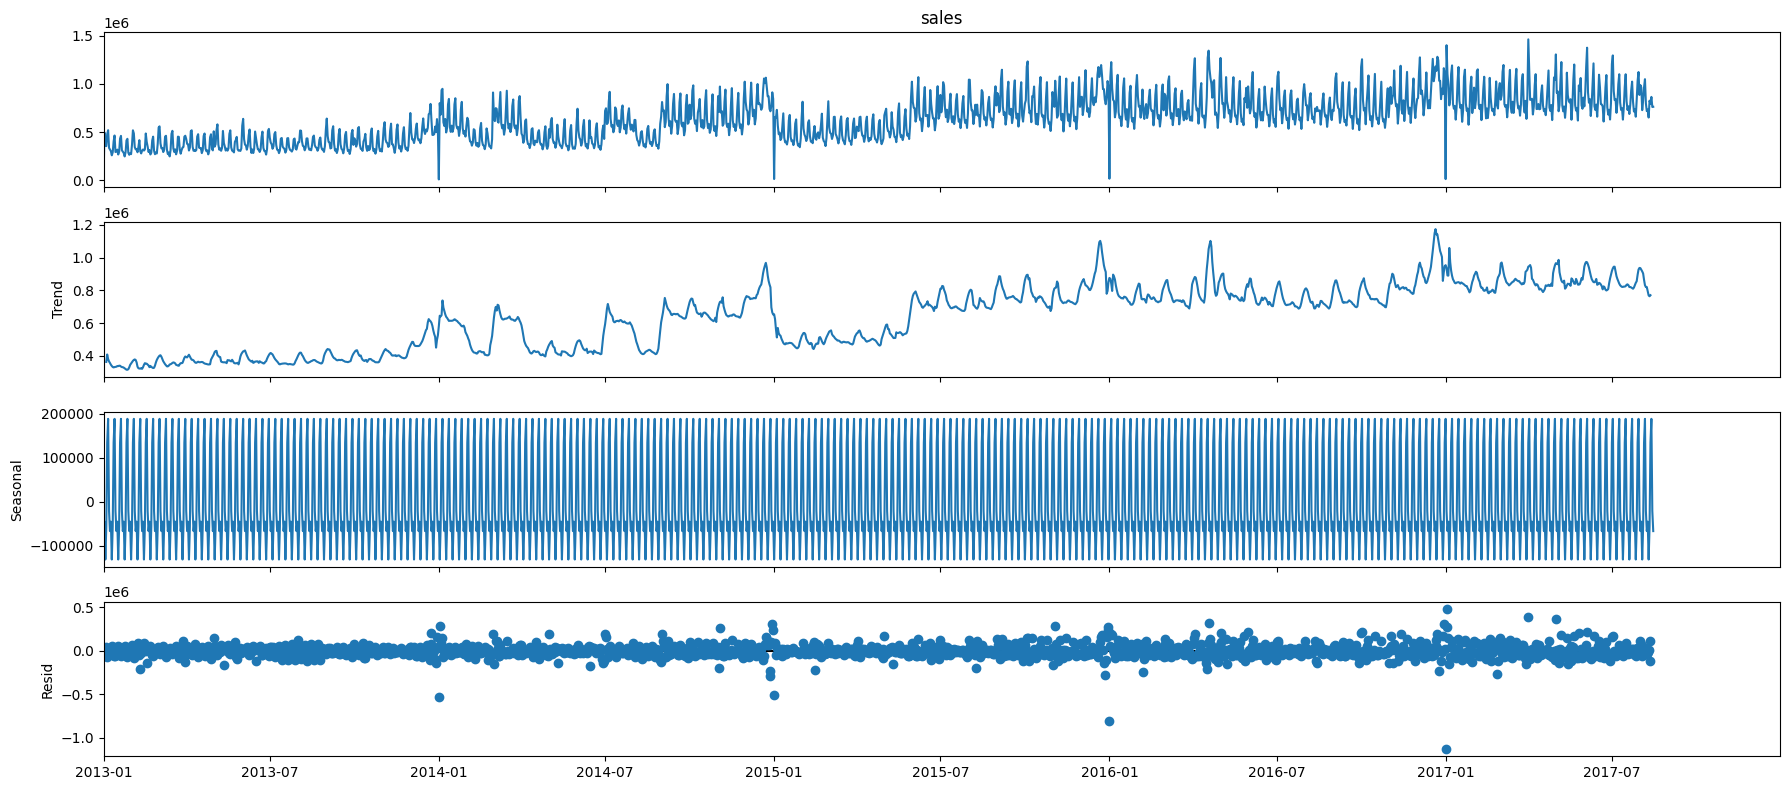

In [20]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=18,8
result=seasonal_decompose(new2,model='additive')
plt.figure(figsize=(16, 16))
fig=result.plot()
plt.xlim('2013-01-01','2017-12-31')
fig.show()
print(4)
print(result)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12048\2572780373.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4


<Figure size 3000x3000 with 0 Axes>

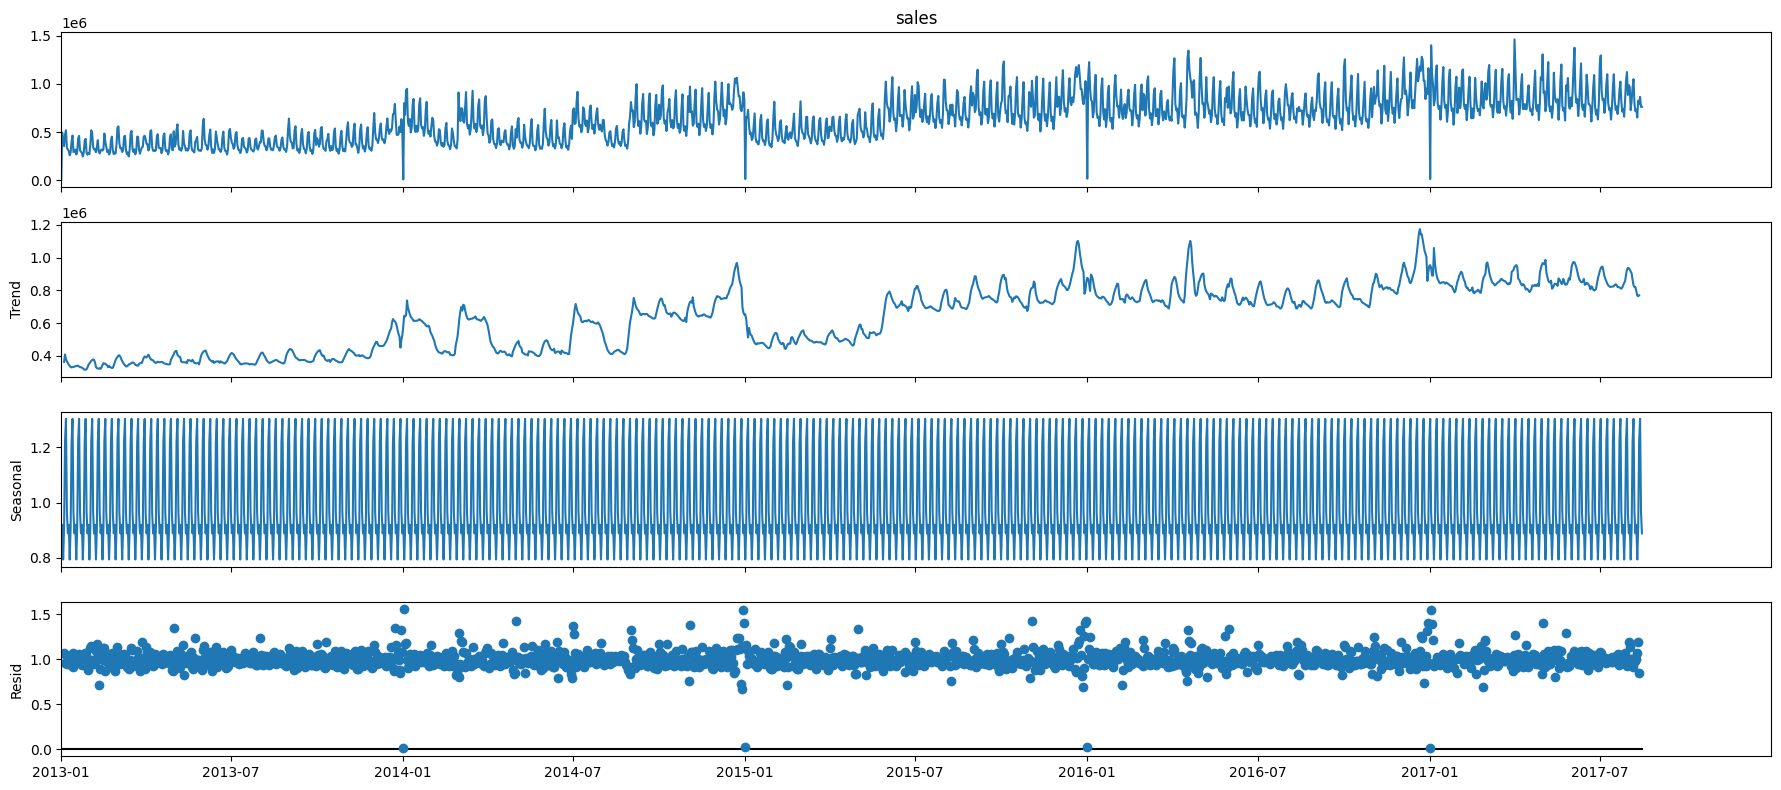

In [21]:
result2=seasonal_decompose(new2,model='multiplicable')
plt.figure(figsize=(30, 30))
fig=result2.plot()
plt.xlim('2013-01-01','2017-12-31')
fig.show()
print(4)
print(result2)

## In both the additional and seasonal decompose we are getting almost the same trend and seasonality so we can choose either of them. Reason being very slight change in trend and same seasonality throughout.

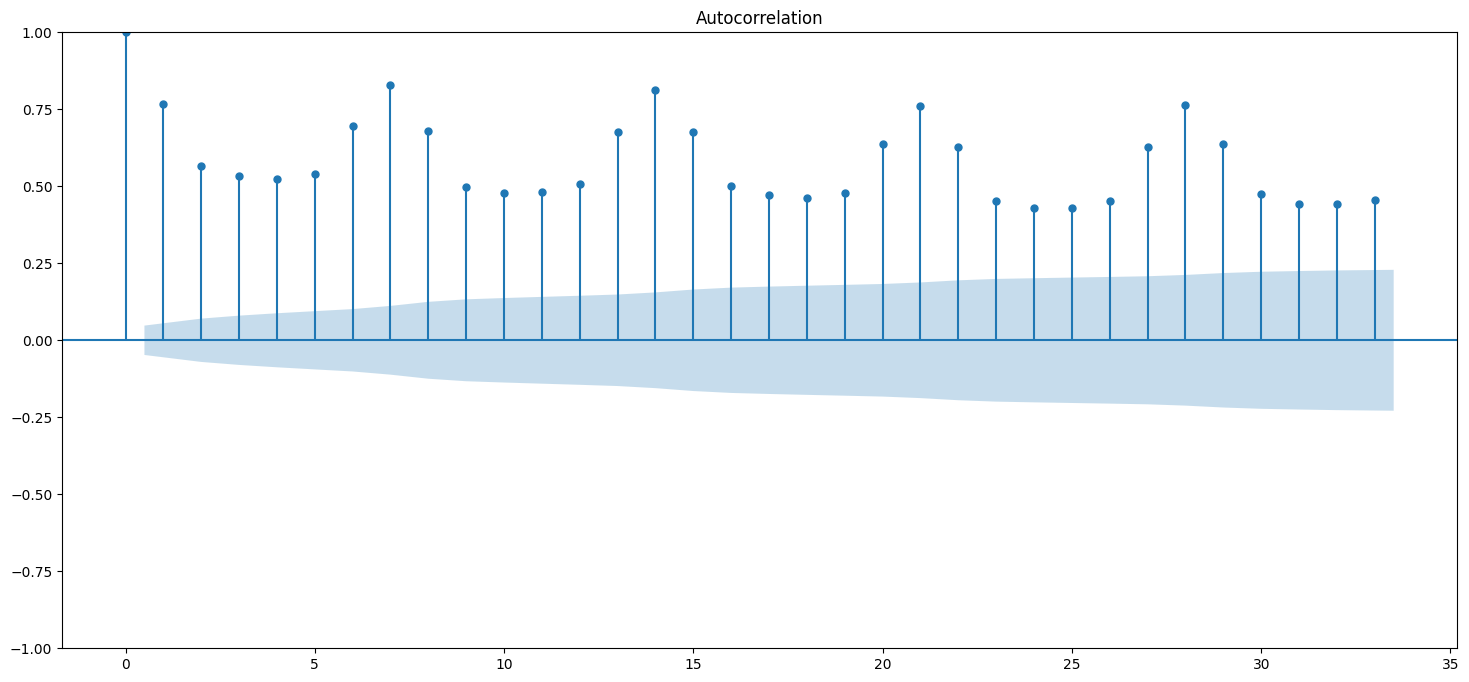

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(new2,alpha=0.05)
pyplot.show()

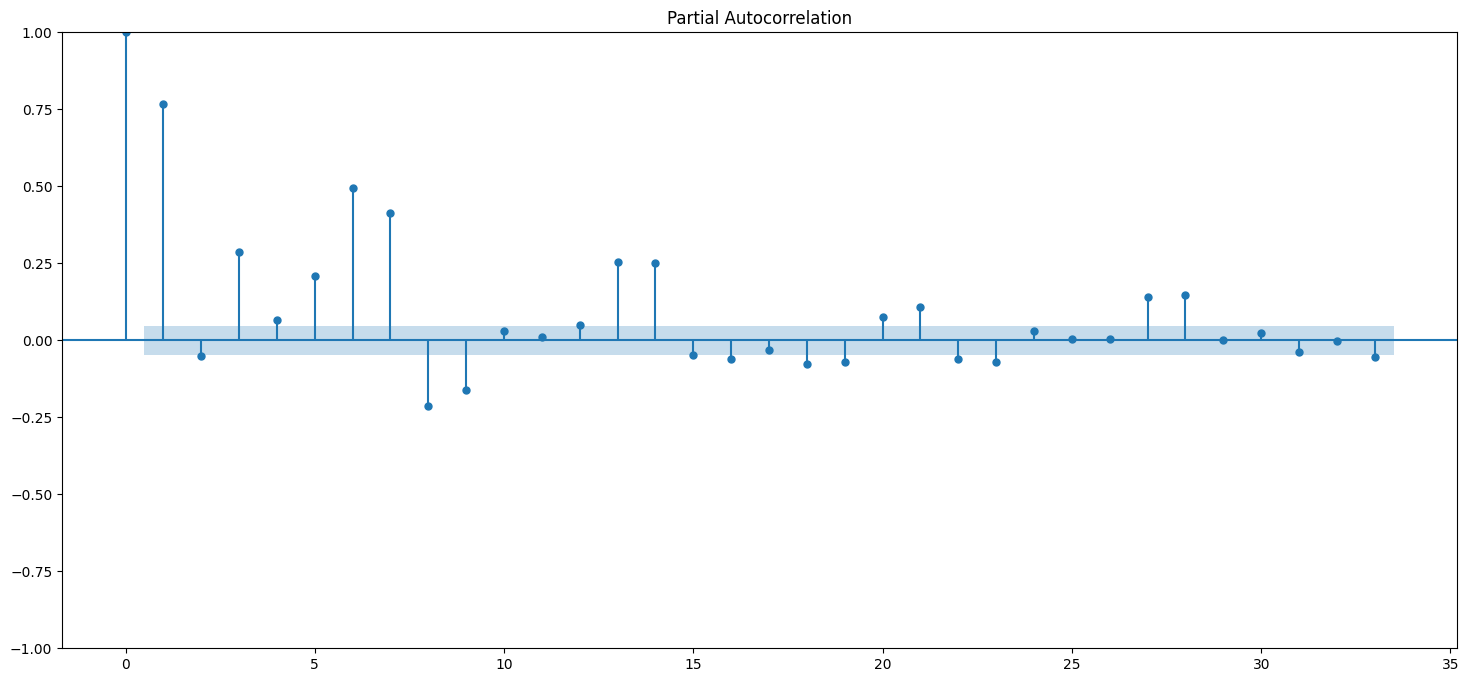

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new2,alpha=0.05)
pyplot.show()

In [58]:
import itertools
import statsmodels.api as sm
p = range(0, 4)
q= range(0, 4)
d= range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
[(0, 0, 0, 7), (0, 0, 1, 7), (0, 0, 2, 7), (0, 0, 3, 7), (0, 1, 0, 7), (0, 1, 1, 7), (0, 1, 2, 7), (0, 1, 3, 7), (1, 0, 0, 7), (1, 0, 1, 7), (1, 0, 2, 7), (1, 0, 3, 7), (1, 1, 0, 7), (1, 1, 1, 7), (1, 1, 2, 7), (1, 1, 3, 7), (2, 0, 0, 7), (2, 0, 1, 7), (2, 0, 2, 7), (2, 0, 3, 7), (2, 1, 0, 7), (2, 1, 1, 7), (2, 1, 2, 7), (2, 1, 3, 7), (3, 0, 0, 7), (3, 0, 1, 7), (3, 0, 2, 7), (3, 0, 3, 7), (3, 1, 0, 7), (3, 1, 1, 7), (3, 1, 2, 7), (3, 1, 3, 7)]


In [26]:
train=new[:'2017-06-30']
test=new['2017-07-01':]
space="---------------------------------------------------"
print(train,space,test)
print(test.size)

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-06-26    755367.845067
2017-06-27    682218.468913
2017-06-28    731896.985010
2017-06-29    630811.802872
2017-06-30    802273.139233
Freq: D, Name: sales, Length: 1642, dtype: float64 --------------------------------------------------- date
2017-07-01    1.207530e+06
2017-07-02    1.296379e+06
2017-07-03    9.251434e+05
2017-07-04    8.323593e+05
2017-07-05    8.443016e+05
2017-07-06    7.002720e+05
2017-07-07    8.057923e+05
2017-07-08    9.983472e+05
2017-07-09    1.100833e+06
2017-07-10    8.041589e+05
2017-07-11    7.305348e+05
2017-07-12    7.488000e+05
2017-07-13    6.296514e+05
2017-07-14    7.654896e+05
2017-07-15    9.690771e+05
2017-07-16    1.100804e+06
2017-07-17    8.183255e+05
2017-07-18    7.301337e+05
2017-07-19    7.679788e+05
2017-07-20    6.882881e+05
2017-07-21    7.824183e+05
2017-07-22  

# forecast=final_results.get_forecast(steps=8)
predicted=forecast.predicted_mean
print(predicted)

In [30]:
import math
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_percentage_error
minimum=math.inf

In [ ]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
         try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = mod.fit()
            test_forecasted=results.get_forecast(steps=46)
            test_vals=test_forecasted.predicted_mean
            test_mse = ((test_vals - test) ** 2).mean()
            root_mean=round(np.sqrt(test_mse), 2)
            rmsle=mean_squared_log_error(test_vals,test)
            ms=mean_squared_error(test_forecasted,test)
            mape=mean_absolute_percentage_error(test_forecasted,test)
            if rmsle<minimum:
                minimum=rmsle
                ans=results
                ans_param=param
                ans_seasonal=param_seasonal
                fin_mape=mape
                fin_ms=ms
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('parameter - {}, seasonal parameters - {}'.format(ans_param,ans_seasonal))
            print(root_mean, minimum)
         except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print('parameter - {}, seasonal parameters - {}'.format(ans_param,ans_seasonal))
print(root_mean, minimum)           
print("finish")

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

In [31]:
#params 1 with week as seasonality (7 days)
ans_param,ans_seasonal=[0,0,0] , [3,1,3,7]
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train,
                                order=[0,0,0],
                                seasonal_order=[3,1,3,7],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
test_forecasted=results.get_forecast(steps=46)
test_vals=test_forecasted.predicted_mean
test_mse = ((test_vals - test) ** 2).mean()
root_mean=round(np.sqrt(test_mse), 2)
rmsle=mean_squared_log_error(test_vals,test)
#print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print('parameter - {}, seasonal parameters - {}'.format(ans_param,ans_seasonal))
print(root_mean, rmsle)

parameter - [0, 0, 0], seasonal parameters - [3, 1, 3, 7]
77596.9 0.0068715929643542025


In [57]:
 #params 2 with YEAR as seasonality
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train,
                                order=[3,1,3],
                                seasonal_order=[3,0,3,7],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
test_forecasted=results.predict(start='2017-07-01', end='2017-08-15')
#test_vals=test_forecasted.predicted_mean
test_mse = ((test_vals - test) ** 2).mean()
root_mean=round(np.sqrt(test_mse), 2)
rmsle=mean_squared_log_error(test_forecasted,test)
ms=mean_squared_error(test_forecasted,test)
mape=mean_absolute_percentage_error(test_forecasted,test)
#print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
print('parameter - {}, seasonal parameters - {}'.format(ans_param,ans_seasonal))
print(rmsle,ms,mape)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


parameter - [0, 1, 2], seasonal parameters - [1, 0, 0, 365]
0.009395276083730898 7943582127.465288 0.06927640770583234


# 0.0003366   15641

In [27]:
# final evaluation of time series params 1 
mod = sm.tsa.statespace.SARIMAX(new,
                                order=[0,0,0],
                                seasonal_order=[3,1,3,7],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
test_forecasted=results.get_forecast(steps=16)
test_vals=test_forecasted.predicted_mean
print("finish")

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


finish


In [28]:
print(test_vals)

2017-08-16    8.320440e+05
2017-08-17    7.243057e+05
2017-08-18    8.540476e+05
2017-08-19    9.976821e+05
2017-08-20    1.067355e+06
2017-08-21    8.378394e+05
2017-08-22    7.725866e+05
2017-08-23    7.795458e+05
2017-08-24    6.487051e+05
2017-08-25    7.988127e+05
2017-08-26    8.738990e+05
2017-08-27    9.709987e+05
2017-08-28    7.589879e+05
2017-08-29    7.481193e+05
2017-08-30    8.063608e+05
2017-08-31    6.998052e+05
Freq: D, Name: predicted_mean, dtype: float64


In [29]:
import csv

In [30]:
f=open(r"C:\Users\Dell\Documents\projects\sales1\answer.csv","r")

In [31]:
csvreader1=csv.reader(f)
for row in csvreader1:
    print(row)

['id', 'sales']
['16-08-2017', '832044.0079']
['17-08-2017', '724305.7257']
['18-08-2017', '854047.6385']
['19-08-2017', '997682.1204']
['20-08-2017', '1067355.456']
['21-08-2017', '837839.3581']
['22-08-2017', '772586.6036']
['23-08-2017', '779545.7861']
['24-08-2017', '648705.0582']
['25-08-2017', '798812.6843']
['26-08-2017', '873899.0173']
['27-08-2017', '970998.7058']
['28-08-2017', '758987.9036']
['29-08-2017', '748119.2785']
['30-08-2017', '806360.8138']
['31-08-2017', '699805.2472']


In [32]:
f.close()